In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Eq, solve

In [82]:
VTb = 1.93*10**-5
VCo = 6.67*10**-6
tTb = 5.96347
tCo = 4.03653
Co = np.linspace(0,3,100)

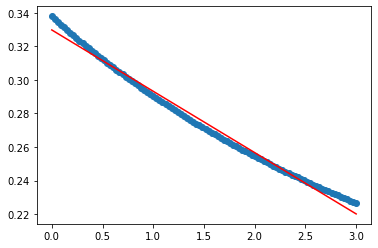

In [83]:
cTb = (tTb/VTb)/((tTb/VTb)+((tCo+Co)/VCo))
z= np.polyfit(Co,cTb, 1)
f = np.poly1d(z)
plt.scatter(Co,cTb)
plt.plot(Co,f(Co),"r")

In [90]:
tTb, tCo = symbols('tTb tCo')
cTb= 22
tTbCo = 10
lista = []
for Co in np.linspace(0,10,100):
    eq1 = Eq(100*(tTb/VTb)/((tTb/VTb) + ((tCo+Co)/VCo)),cTb)
    eq2 =  Eq(tCo + tTb,tTbCo)
    sol = list(solve((eq1,eq2),(tTb,tCo)).values())
    sol.append(Co)
    lista.append(sol)
lista = np.array(lista)

listaTb=[]
for value in lista:
    cTb = 100*(value[0]/VTb)/((value[0]/VTb) + ((value[1])/VCo))
    listaTb.append(cTb)

df = pd.DataFrame({"tCo":np.linspace(0,10,100), "cTb": np.array(list(map(float, listaTb)))})        

In [79]:
df.to_excel('pandas_cTb.xlsx')

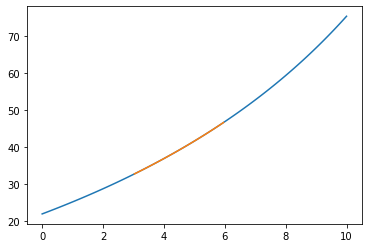

In [88]:
plt.plot(df.tCo,df.cTb)
plt.plot(df.iloc[30:60,0],df.iloc[30:60,1])

In [94]:
x = df.tCo[:30]
y = df.cTb[:30]
z = np.polyfit(x,y, 1)
f = np.poly1d(z)

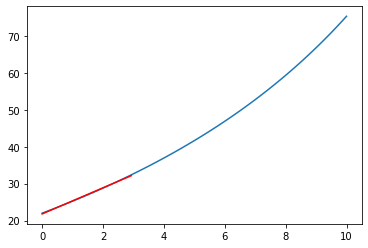

In [96]:
plt.plot(df.tCo,df.cTb)
plt.plot(x, f(x),'r')

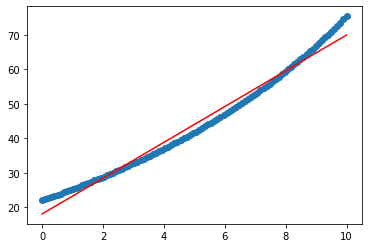

In [66]:
plt.scatter(x,y)
plt.plot(x,f(x),"r")

In [101]:
np.corrcoef(x=[x,y], y = [x,f(x)])

array([[1.        , 0.99939868, 1.        , 1.        ],
       [0.99939868, 1.        , 0.99939868, 0.99939868],
       [1.        , 0.99939868, 1.        , 1.        ],
       [1.        , 0.99939868, 1.        , 1.        ]])